In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading datasets
features_df = pd.read_csv('datasets/car_features.csv')
claim_df = pd.read_csv('datasets/insurance_claim.csv')
policy_df = pd.read_csv('datasets/policy_features.csv')

### Exploratory Data Analysis (EDA)

In [3]:
features_df.info

<bound method DataFrame.info of        Unnamed: 0 policy_id  make segment model fuel_type      max_torque  \
0               0   ID00001     1       A    M1       CNG    60Nm@3500rpm   
1               1   ID00002     1       A    M1       CNG    60Nm@3500rpm   
2               2   ID00003     1       A    M1       CNG    60Nm@3500rpm   
3               3   ID00004     1      C1    M2    Petrol   113Nm@4400rpm   
4               4   ID00005     2       A    M3    Petrol    91Nm@4250rpm   
...           ...       ...   ...     ...   ...       ...             ...   
58510       58510   ID58511     1      B2    M6    Petrol   113Nm@4400rpm   
58511       58511   ID58512     1      B2    M6    Petrol   113Nm@4400rpm   
58512       58512   ID58513     1      B1    M8       CNG  82.1Nm@3400rpm   
58513       58513   ID58514     3      C2    M4    Diesel   250Nm@2750rpm   
58514       58514   ID58515     1      B2    M7    Petrol   113Nm@4400rpm   

               max_power            engine_

In [4]:
features_df.isnull().sum()

Unnamed: 0                           0
policy_id                            0
make                                 0
segment                              0
model                                0
fuel_type                           26
max_torque                           7
max_power                            3
engine_type                          3
airbags                              9
is_esc                               3
is_adjustable_steering               7
is_tpms                              3
is_parking_sensors                   7
is_parking_camera                    3
rear_brakes_type                     0
displacement                         7
cylinder                             7
transmission_type                    0
gear_box                             0
steering_type                        0
turning_radius                       0
length                               0
width                                0
height                               0
gross_weight             

In [5]:
claim_df.info

<bound method DataFrame.info of        Unnamed: 0 policy_id  is_claim
0               0   ID00001         0
1               1   ID00002         0
2               2   ID00003         0
3               3   ID00004         0
4               4   ID00005         0
...           ...       ...       ...
58510       58510   ID58511         0
58511       58511   ID58512         0
58512       58512   ID58513         0
58513       58513   ID58514         0
58514       58514   ID58515         0

[58515 rows x 3 columns]>

In [6]:
claim_df.isnull().sum()

Unnamed: 0    0
policy_id     0
is_claim      0
dtype: int64

In [7]:
policy_df.info

<bound method DataFrame.info of        Unnamed: 0 policy_id  policy_tenure  age_of_car  age_of_policyholder  \
0               0   ID00001       0.515874        0.05             0.644231   
1               1   ID00002       0.672619        0.02             0.375000   
2               2   ID00003       0.841110        0.02             0.384615   
3               3   ID00004       0.900277        0.11             0.432692   
4               4   ID00005       0.596403        0.11             0.634615   
...           ...       ...            ...         ...                  ...   
58510       58510   ID58511       0.097840        0.10             0.394231   
58511       58511   ID58512       1.038564        0.11             0.480769   
58512       58512   ID58513       0.294251        0.07             0.509615   
58513       58513   ID58514       0.724399        0.06             0.307692   
58514       58514   ID58515       0.069687        0.13             0.576923   

      area_cluster 

In [8]:
policy_df.isnull().sum()

Unnamed: 0              0
policy_id               0
policy_tenure          20
age_of_car              5
age_of_policyholder     7
area_cluster            6
population_density     12
dtype: int64

In [9]:
# combining all 3 datasets into a single dataset
final_df = features_df.merge(claim_df, on = 'policy_id', ).merge(policy_df, on = 'policy_id')

In [10]:
final_df = final_df.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis = 1)

In [11]:
final_df.info

<bound method DataFrame.info of       policy_id  make segment model fuel_type      max_torque  \
0       ID00001     1       A    M1       CNG    60Nm@3500rpm   
1       ID00002     1       A    M1       CNG    60Nm@3500rpm   
2       ID00003     1       A    M1       CNG    60Nm@3500rpm   
3       ID00004     1      C1    M2    Petrol   113Nm@4400rpm   
4       ID00005     2       A    M3    Petrol    91Nm@4250rpm   
...         ...   ...     ...   ...       ...             ...   
58510   ID58511     1      B2    M6    Petrol   113Nm@4400rpm   
58511   ID58512     1      B2    M6    Petrol   113Nm@4400rpm   
58512   ID58513     1      B1    M8       CNG  82.1Nm@3400rpm   
58513   ID58514     3      C2    M4    Diesel   250Nm@2750rpm   
58514   ID58515     1      B2    M7    Petrol   113Nm@4400rpm   

               max_power            engine_type  airbags is_esc  ...  \
0       40.36bhp@6000rpm      F8D Petrol Engine      2.0     No  ...   
1       40.36bhp@6000rpm      F8D Petrol En

In [12]:
final_df.isnull().sum()

policy_id                            0
make                                 0
segment                              0
model                                0
fuel_type                           26
max_torque                           7
max_power                            3
engine_type                          3
airbags                              9
is_esc                               3
is_adjustable_steering               7
is_tpms                              3
is_parking_sensors                   7
is_parking_camera                    3
rear_brakes_type                     0
displacement                         7
cylinder                             7
transmission_type                    0
gear_box                             0
steering_type                        0
turning_radius                       0
length                               0
width                                0
height                               0
gross_weight                         0
is_front_fog_lights      

In [13]:
final_df.dropna(inplace = True)

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58442 entries, 0 to 58514
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58442 non-null  object 
 1   make                              58442 non-null  int64  
 2   segment                           58442 non-null  object 
 3   model                             58442 non-null  object 
 4   fuel_type                         58442 non-null  object 
 5   max_torque                        58442 non-null  object 
 6   max_power                         58442 non-null  object 
 7   engine_type                       58442 non-null  object 
 8   airbags                           58442 non-null  float64
 9   is_esc                            58442 non-null  object 
 10  is_adjustable_steering            58442 non-null  object 
 11  is_tpms                           58442 non-null  object 
 12  is_parkin

##### Calculating chi-squared statistic and p value

In [15]:
from scipy.stats import chi2_contingency

In [16]:
contingency_table = pd.crosstab(final_df['is_claim'], final_df['ncap_rating'])

In [17]:
chi2,p,dof,expected = chi2_contingency(contingency_table)

In [18]:
p

0.8319259809310986

In [19]:
chi2

1.4700907412200876

In [20]:
final_df.describe()

,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,policy_tenure,age_of_car,age_of_policyholder,population_density
count,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000,58442.000000
mean,1.763492,3.136118,1162.285565,3.626895,5.245252,4.852776,3850.346070,1672.206410,1553.325536,1385.214811,1.759813,0.064012,0.611229,0.069407,0.469414,18828.756853
std,1.137122,1.832220,266.302904,0.483634,0.430240,0.228030,311.421038,112.092157,79.628588,212.373655,1.389912,0.244777,0.414129,0.056715,0.122902,17664.346320
min,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000,0.002735,0.000000,0.288462,290.000000
25%,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000,0.000000,0.210141,0.020000,0.365385,6112.000000
50%,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000,0.573833,0.060000,0.451923,8794.000000
75%,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,0.000000,1.039022,0.110000,0.548077,27003.000000
max,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000,1.396641,1.000000,1.000000,73430.000000


### EDA using Data Visualization

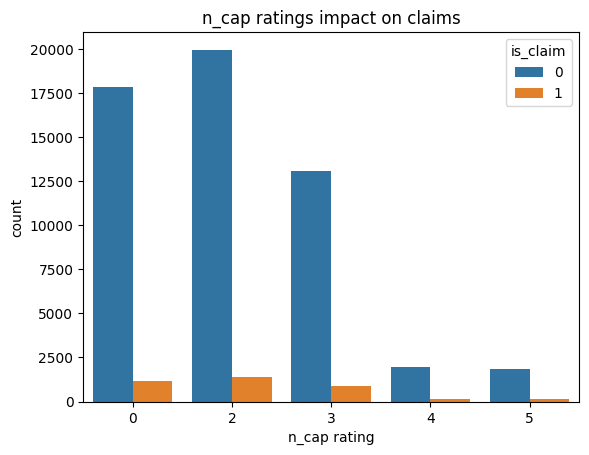

In [21]:
sns.countplot(data = final_df, x ='ncap_rating',hue = 'is_claim')
plt.title('n_cap ratings impact on claims')
plt.xlabel('n_cap rating')

plt.show()

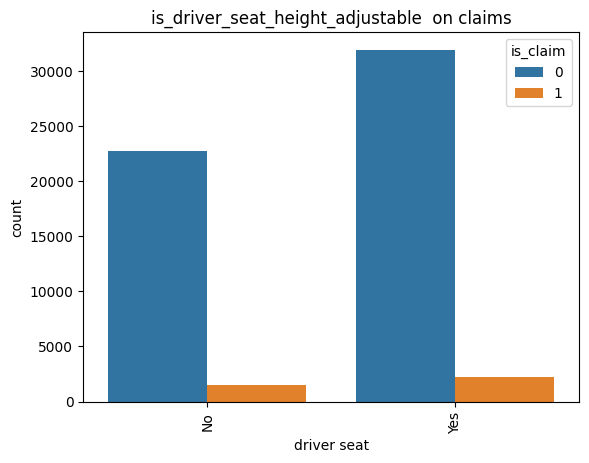

In [22]:
sns.countplot(data = final_df, x ='is_driver_seat_height_adjustable',hue = 'is_claim')
plt.title('is_driver_seat_height_adjustable  on claims')
plt.xlabel('driver seat')
plt.xticks(rotation = 90)
plt.show()

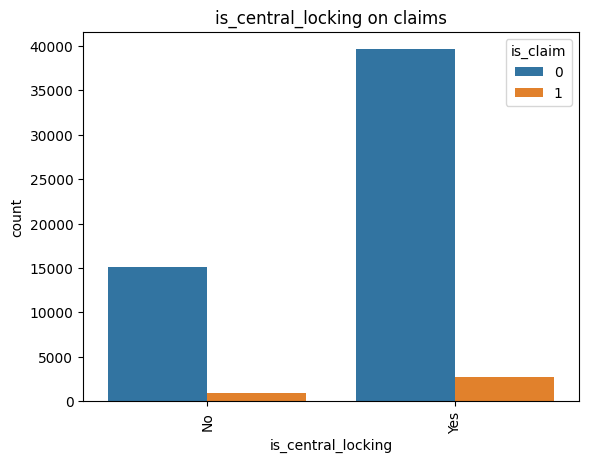

In [23]:
sns.countplot(data = final_df, x ='is_central_locking',hue = 'is_claim')
plt.title('is_central_locking on claims')
plt.xlabel('is_central_locking')
plt.xticks(rotation = 90)
plt.show()

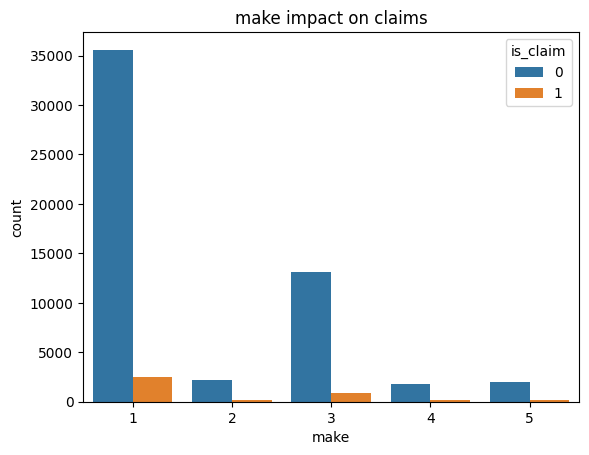

In [24]:
sns.countplot(data = final_df, x ='make',hue = 'is_claim')
plt.title('make impact on claims')
plt.xlabel('make')

plt.show()

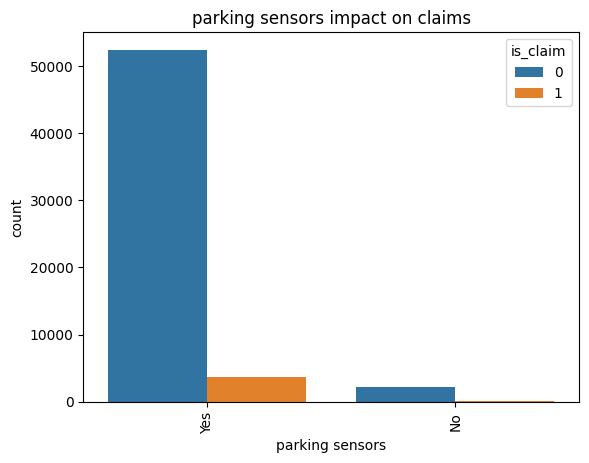

In [25]:
sns.countplot(data = final_df, x ='is_parking_sensors',hue = 'is_claim')
plt.title('parking sensors impact on claims')
plt.xlabel('parking sensors')
plt.xticks(rotation = 90)
plt.show()

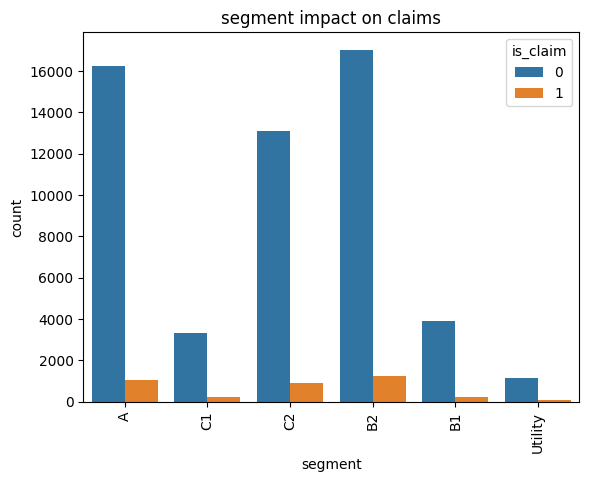

In [26]:
sns.countplot(data = final_df, x ='segment',hue = 'is_claim')
plt.title('segment impact on claims')
plt.xlabel('segment')
plt.xticks(rotation = 90)
plt.show()

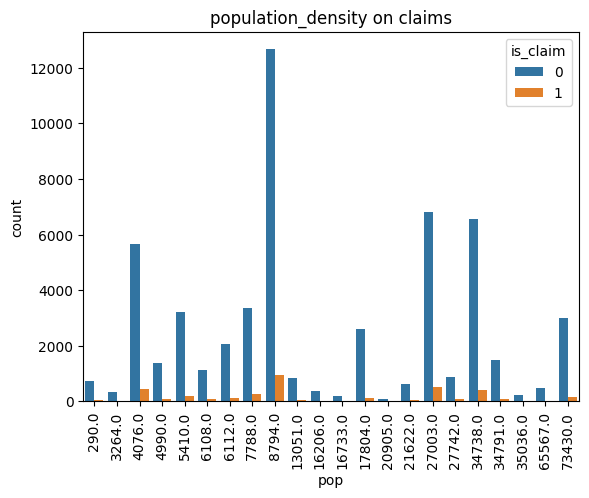

In [27]:
sns.countplot(data = final_df, x ='population_density',hue = 'is_claim')
plt.title('population_density on claims')
plt.xlabel('pop')
plt.xticks(rotation = 90)
plt.show()

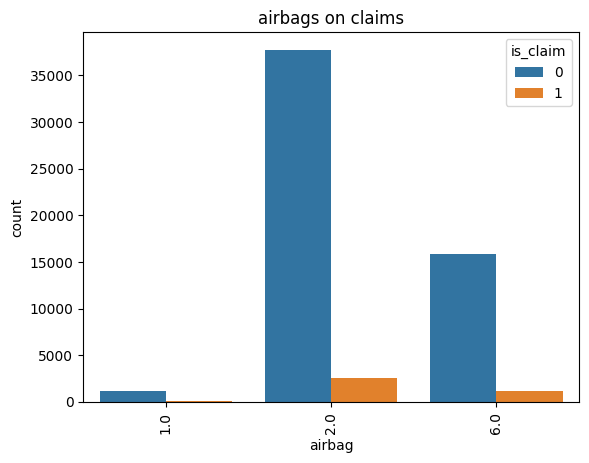

In [28]:
sns.countplot(data = final_df, x ='airbags',hue = 'is_claim')
plt.title('airbags on claims')
plt.xlabel('airbag')
plt.xticks(rotation = 90)
plt.show()

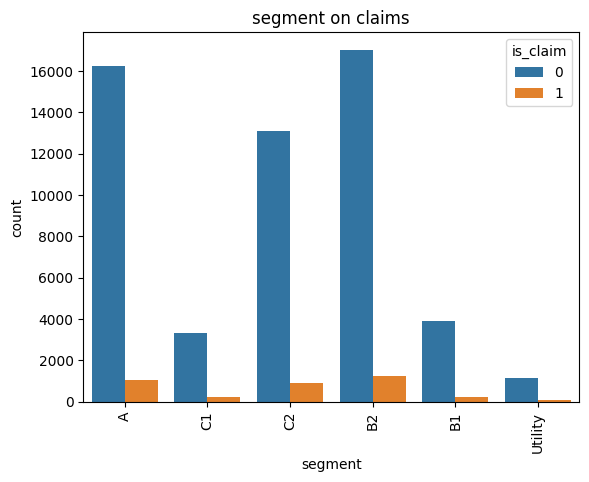

In [29]:
sns.countplot(data = final_df, x ='segment',hue = 'is_claim')
plt.title('segment on claims')
plt.xlabel('segment')
plt.xticks(rotation = 90)
plt.show()

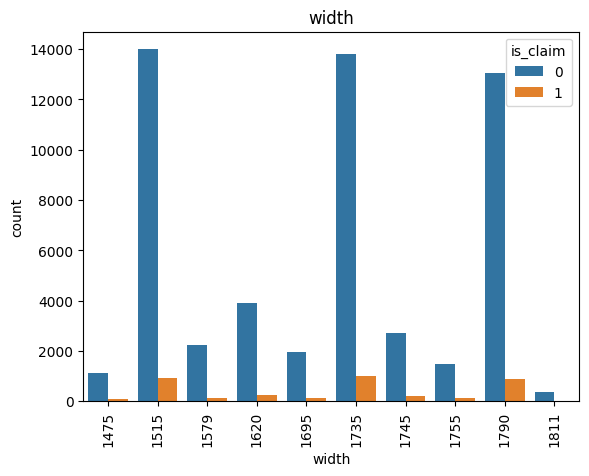

In [30]:
sns.countplot(data = final_df, x ='width',hue = 'is_claim')
plt.title('width')
plt.xlabel('width')
plt.xticks(rotation = 90)
plt.show()

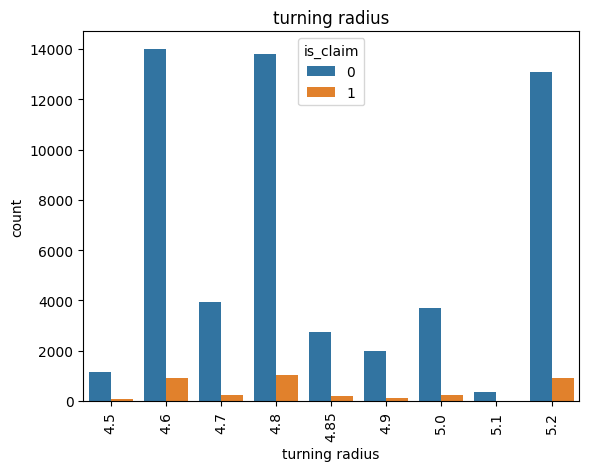

In [31]:
sns.countplot(data = final_df, x ='turning_radius',hue = 'is_claim')
plt.title('turning radius')
plt.xlabel('turning radius')
plt.xticks(rotation = 90)
plt.show()

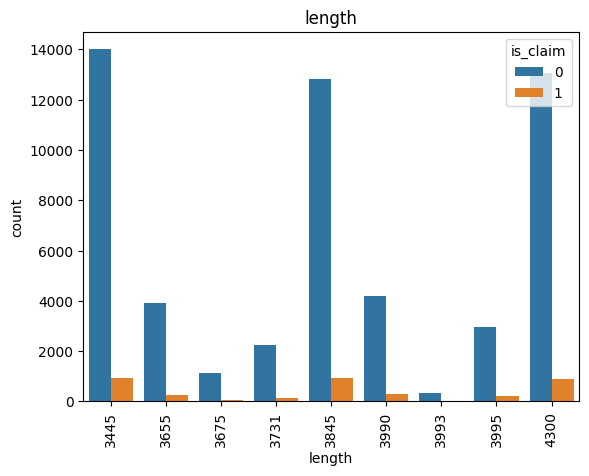

In [32]:
sns.countplot(data = final_df, x ='length',hue = 'is_claim')
plt.title('length')
plt.xlabel('length')
plt.xticks(rotation = 90)
plt.show()

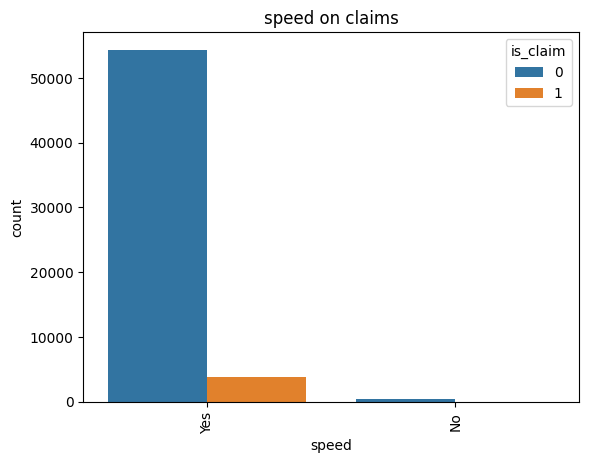

In [33]:
sns.countplot(data = final_df, x ='is_speed_alert',hue = 'is_claim')
plt.title('speed on claims')
plt.xlabel('speed')
plt.xticks(rotation = 90)
plt.show()

In [34]:
# function to calculate claim percentage
def claim_percentage(series):
    return (series.mean()*100)

In [35]:
# function to calculate percentage of claims
def percentage_of_claims(series):
    return(series.sum()/len(series))*100

In [36]:
claim_percentage(final_df.groupby('make')['is_claim'])

make
1    6.445677
2    5.379077
3    6.428060
4    6.680265
5    6.306306
Name: is_claim, dtype: float64

In [37]:
pd.pivot_table(final_df,values ='is_claim',index ='make',columns ='ncap_rating',aggfunc = percentage_of_claims)

ncap_rating,0,2,3,4,5
make,,,,,
1,6.245408,6.646653,NaN,NaN,NaN
2,NaN,5.379077,NaN,NaN,NaN
3,NaN,NaN,6.42806,NaN,NaN
4,NaN,NaN,NaN,NaN,6.680265
5,NaN,NaN,NaN,6.306306,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'F8D Petrol Engine'),
  Text(1, 0, '1.2 L K12N Dualjet'),
  Text(2, 0, '1.0 SCe'),
  Text(3, 0, '1.5 L U2 CRDi'),
  Text(4, 0, '1.5 Turbocharged Revotorq'),
  Text(5, 0, 'K Series Dual jet'),
  Text(6, 0, '1.2 L K Series Engine'),
  Text(7, 0, 'K10C'),
  Text(8, 0, 'G12B'),
  Text(9, 0, 'i-DTEC'),
  Text(10, 0, '1.5 Turbocharged Revotron')])

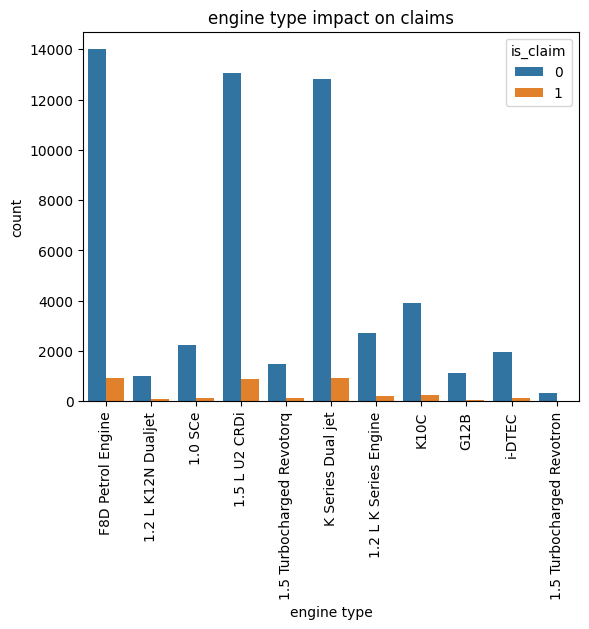

In [38]:
sns.countplot(data = final_df, x ='engine_type',hue = 'is_claim')
plt.title('engine type impact on claims')
plt.xlabel('engine type')
plt.xticks(rotation = 90)

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

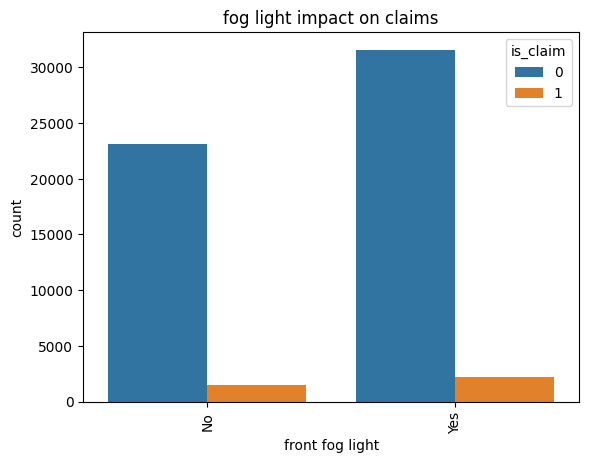

In [39]:
sns.countplot(data = final_df, x ='is_front_fog_lights',hue = 'is_claim')
plt.title('fog light impact on claims')
plt.xlabel('front fog light')
plt.xticks(rotation = 90)

In [40]:
claim_percentage(final_df.groupby('engine_type')['is_claim'])

engine_type
1.0 SCe                      5.379077
1.2 L K Series Engine        6.823610
1.2 L K12N Dualjet           7.434944
1.5 L U2 CRDi                6.428060
1.5 Turbocharged Revotorq    7.259074
1.5 Turbocharged Revotron    4.132231
F8D Petrol Engine            6.147761
G12B                         6.048053
K Series Dual jet            6.831078
K10C                         5.834334
i-DTEC                       6.306306
Name: is_claim, dtype: float64

In [41]:
pd.pivot_table(final_df,values ='is_claim',index ='engine_type',columns ='ncap_rating',aggfunc=percentage_of_claims)

ncap_rating,0,2,3,4,5
engine_type,,,,,
1.0 SCe,NaN,5.379077,NaN,NaN,NaN
1.2 L K Series Engine,6.823610,NaN,NaN,NaN,NaN
1.2 L K12N Dualjet,NaN,7.434944,NaN,NaN,NaN
1.5 L U2 CRDi,NaN,NaN,6.42806,NaN,NaN
1.5 Turbocharged Revotorq,NaN,NaN,NaN,NaN,7.259074
1.5 Turbocharged Revotron,NaN,NaN,NaN,NaN,4.132231
F8D Petrol Engine,6.147761,NaN,NaN,NaN,NaN
G12B,6.048053,NaN,NaN,NaN,NaN
K Series Dual jet,NaN,6.831078,NaN,NaN,NaN


In [42]:
pd.pivot_table(final_df,values ='is_claim',index ='rear_brakes_type',columns ='engine_type',aggfunc =percentage_of_claims)

engine_type,1.0 SCe,1.2 L K Series Engine,1.2 L K12N Dualjet,1.5 L U2 CRDi,1.5 Turbocharged Revotorq,1.5 Turbocharged Revotron,F8D Petrol Engine,G12B,K Series Dual jet,K10C,i-DTEC
rear_brakes_type,,,,,,,,,,,
Disc,NaN,NaN,NaN,6.42806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drum,5.379077,6.82361,7.434944,NaN,7.259074,4.132231,6.147761,6.048053,6.831078,5.834334,6.306306


<Axes: xlabel='rear_brakes_type', ylabel='count'>

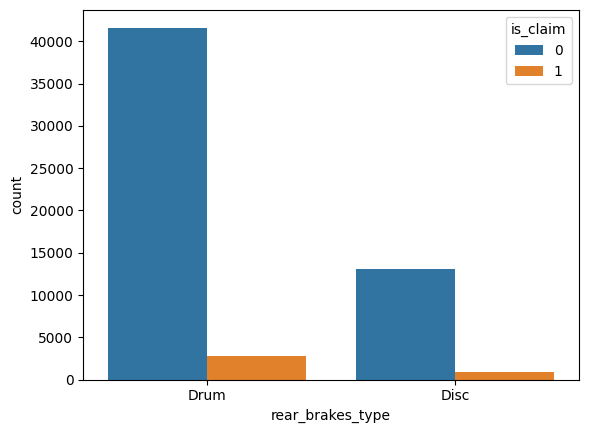

In [43]:
sns.countplot(data = final_df, x ='rear_brakes_type',hue = 'is_claim')

In [44]:
pd.pivot_table(final_df,columns =['make', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type'],  values = "is_claim", index = ['is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'] , aggfunc = sum, fill_value = 0)

/var/folders/3y/ww7tw2lx5kg_lbgnmxljzllh0000gn/T/ipykernel_12779/3416421067.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(final_df,columns =['make', 'segment', 'model', 'fuel_type', 'max_torque',


make                                                                                                                                                                                                                                                                                              1  \
segment                                                                                                                                                                                                                                                                                           A   
model                                                                                                                                                                                                                                                                                            M1   
fuel_type                                                                                                                                                                                                                                                                                       CNG   
max_torque                                                                                                                                                                                                                                                                             60Nm@3500rpm   
max_power                                                                                                                                                                                                                                                                          40.36bhp@6000rpm   
engine_type                                                                                                                                                                                                                                                                       F8D Petrol Engine   
is_esc is_adjustable_steering is_tpms is_parking_sensors is_parking_camera rear_brakes_type is_rear_window_defogger is_brake_assist is_power_door_locks is_central_locking is_power_steering is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw is_speed_alert                     
No     No                     No      No                 Yes               Drum             No                      No              Yes                 Yes                Yes               No                               Yes                           Yes    Yes                            0   
                                      Yes                No                Drum             No                      No              No                  No                 No                No                               No                            No     Yes                            0   
                                                                                                                                                                           Yes               No                               No                            No     Yes                          917   
                                                                                                                                    Yes                 Yes                Yes               No                               No                            Yes    Yes                            0   
       Yes                    No      Yes                No                Drum             No                      No              Yes                 Yes                Yes               No                               No                            Yes    Yes                            0   
                                                                                                                    Yes             Yes                 Yes          

<Axes: >

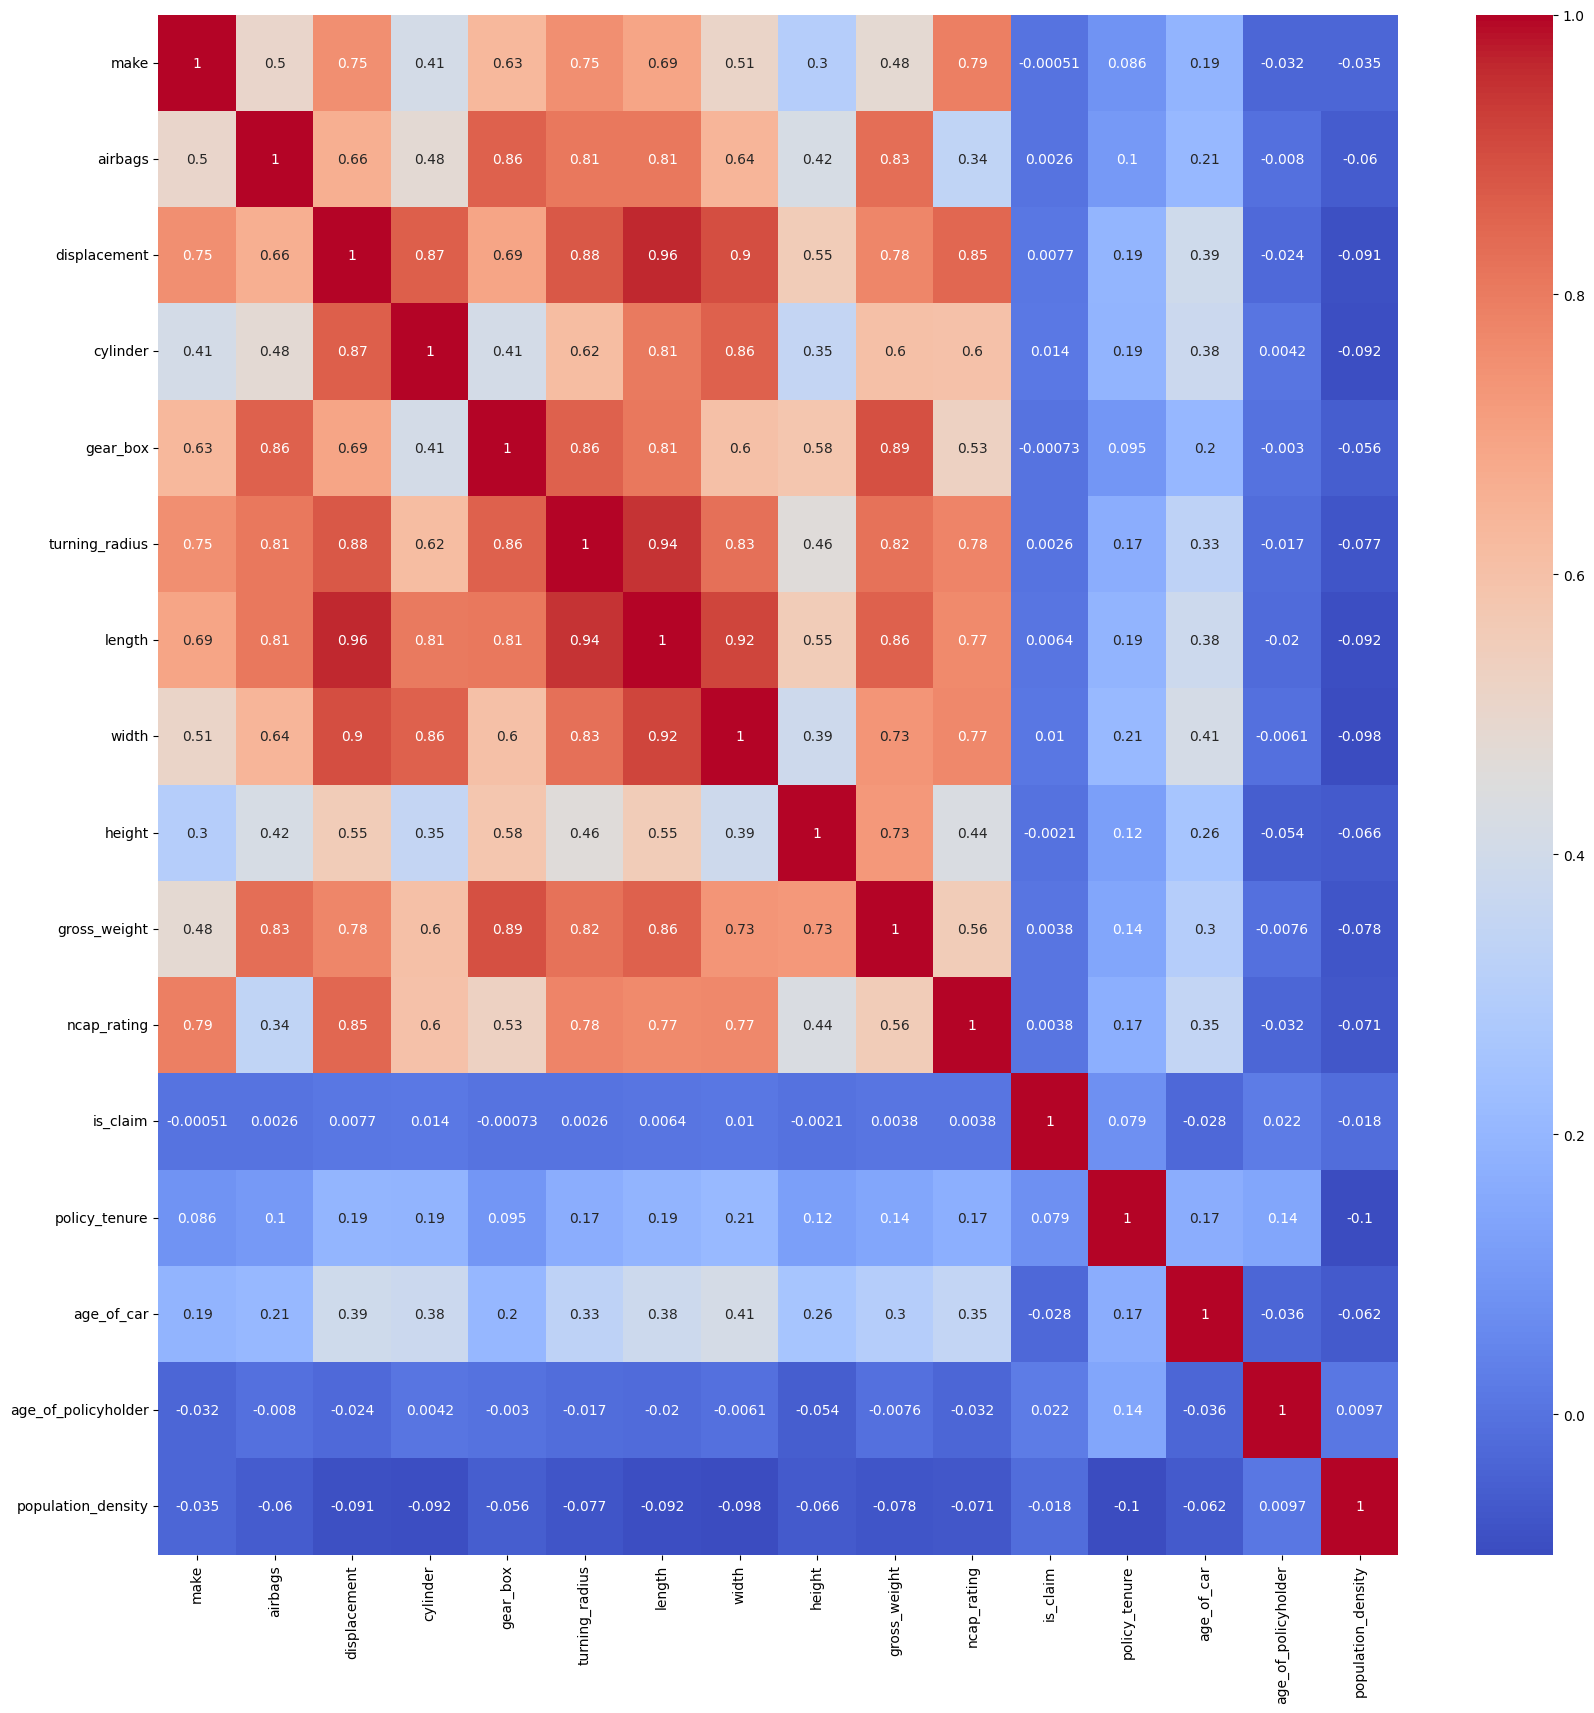

In [45]:
correlation_matrix = final_df.corr(numeric_only = True)
plt.figure(figsize =(20,20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

In [46]:
final_copy = final_df
final_copy.replace({'Yes': 1, 'No': 0}, inplace = True)

/var/folders/3y/ww7tw2lx5kg_lbgnmxljzllh0000gn/T/ipykernel_12779/737805706.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_copy.replace({'Yes': 1, 'No': 0}, inplace = True)


Text(0.5, 1.0, 'correlation heat map')

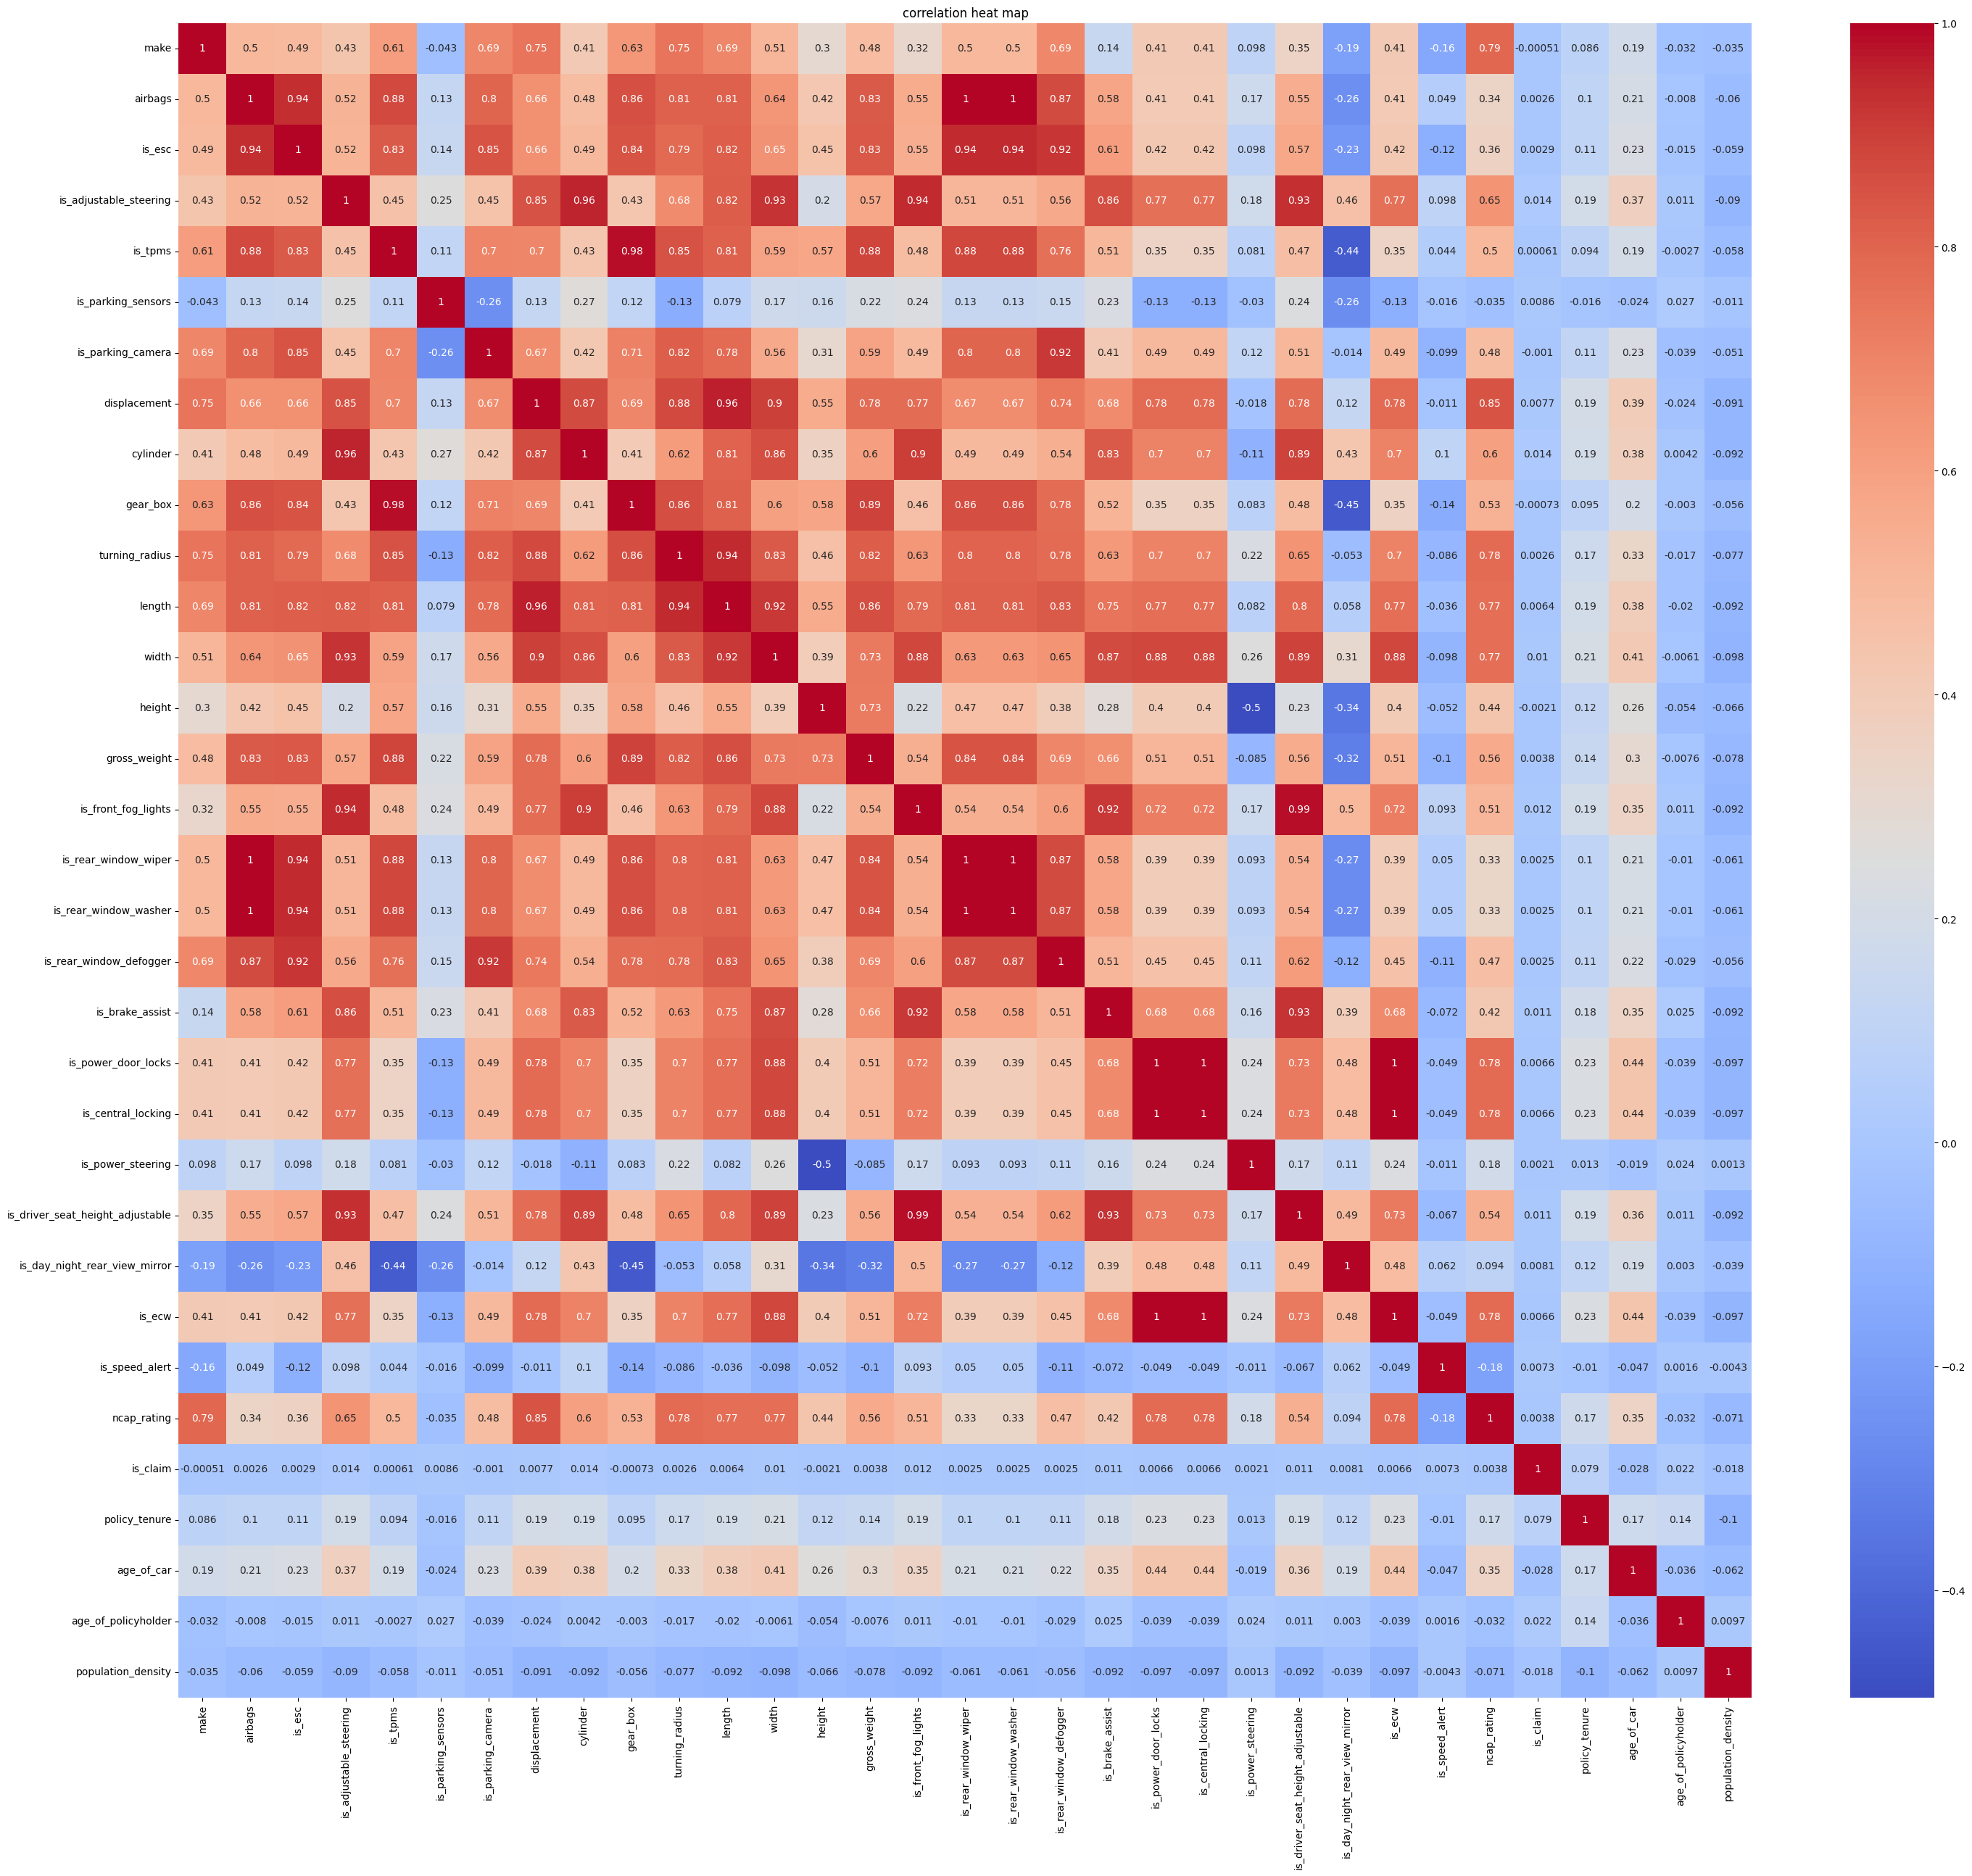

In [47]:
correlation_matrix = final_copy.corr(numeric_only = True)
plt.figure(figsize =(35,30))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('correlation heat map')

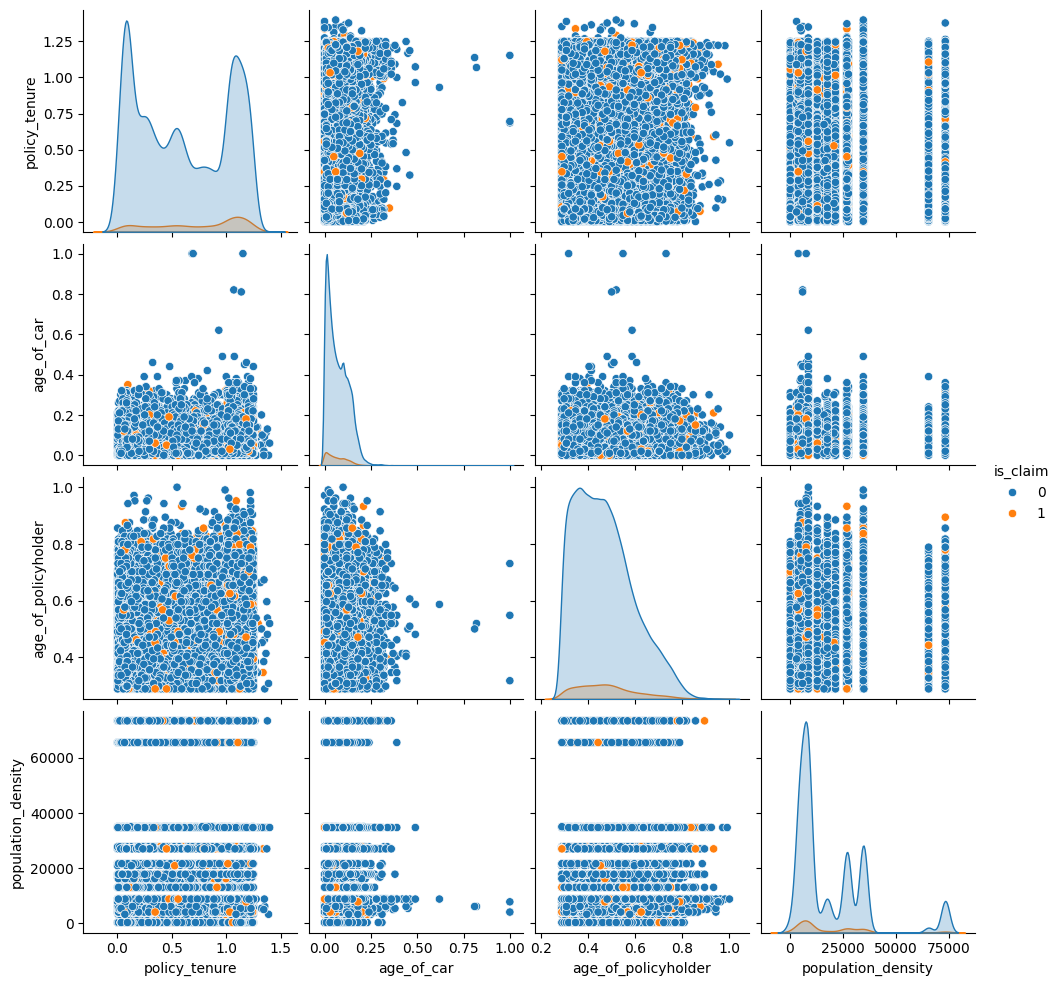

In [48]:
columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
           'area_cluster', 'population_density','is_claim']
sns.pairplot(final_copy[columns], hue ='is_claim', diag_kind ='auto')

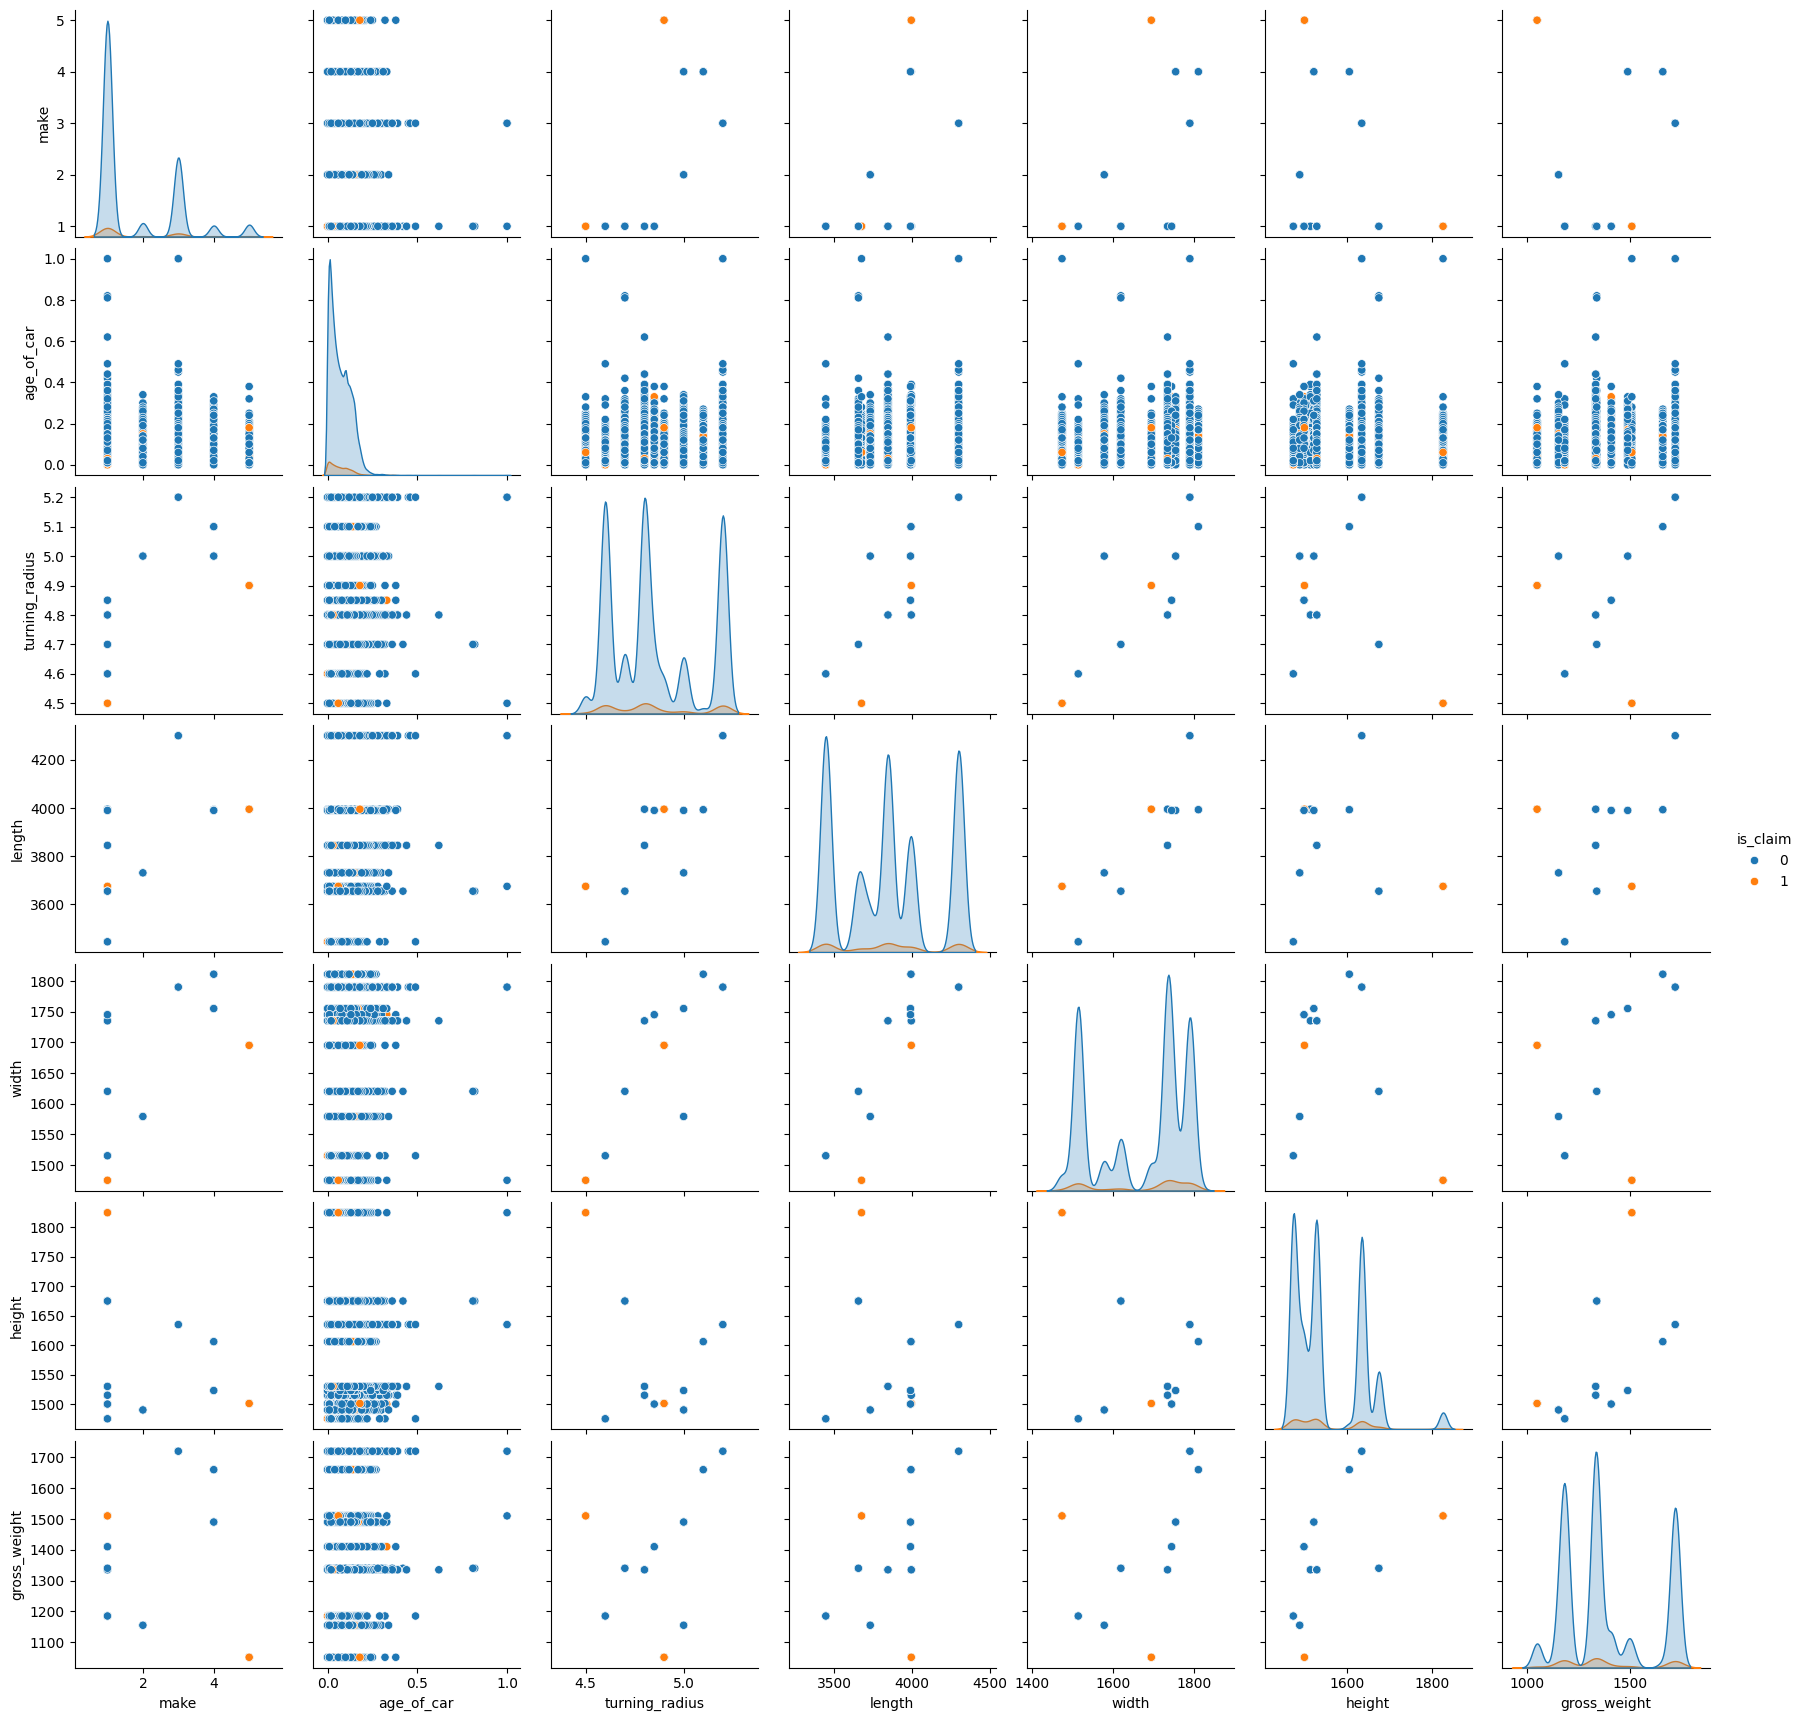

In [49]:
columns = ['make', 'segment', 'model','is_claim','age_of_car','turning_radius',
       'length', 'width', 'height', 'gross_weight']

sns.pairplot(final_copy[columns], hue ='is_claim')

### Classification Algorithms

#### Data Preparation

In [50]:
final_df.columns

Index(['policy_id', 'make', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'policy_tenure',
       'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density'],
      dtype='object')

In [51]:
final_df.drop('policy_id', axis = 1, inplace = True)

In [52]:
#One hot encoding
final_df = pd.get_dummies(final_df, drop_first=True)

In [53]:
#Using pearson correlation to identify that dependency as target varible is binary
corr_matrix = final_df.corr(method = 'pearson')
df_importance = corr_matrix['is_claim'].sort_values(ascending=False)
new_df_imp = df_importance.to_frame()
new_df_imp

,is_claim
is_claim,1.000000
policy_tenure,0.079091
age_of_policyholder,0.022402
is_adjustable_steering,0.014028
area_cluster_C14,0.013680
...,...
area_cluster_C7,-0.010950
area_cluster_C9,-0.012800
area_cluster_C10,-0.016604
population_density,-0.017865


In [54]:
##Split train test data
df_data = final_df.sample(n = len(final_df), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [55]:
df_valid_test = df_data.sample(frac = 0.30,random_state = 42)

In [56]:
df_test = df_valid_test.sample(frac = 0.50,random_state=42)
df_valid = df_valid_test.drop(df_test.index)

In [57]:
df_train_all = df_data.drop(df_valid_test.index)

In [58]:
#check if new dfs are balanced or not
print('test distribution:',(df_test.groupby('is_claim').size()))
print('valid distribution:',(df_valid.groupby('is_claim').size()))
print('train distribution:',(df_train_all.groupby('is_claim').size()))

test distribution: is_claim
0    8197
1     569
dtype: int64
valid distribution: is_claim
0    8228
1     539
dtype: int64
train distribution: is_claim
0    38276
1     2633
dtype: int64


In [59]:
#Above stats confirms it's an imbalanced dataset. 
#split train data into positive and negatives
rows_pos = df_train_all.is_claim == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

#merge balance data
df_train = pd.concat([df_train_pos,df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

#shuffle samples
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_train.groupby('is_claim').size()))

train distribution: is_claim
0    2633
1    2633
dtype: int64


In [60]:
#split valid data into positive and negatives
rows_pos = df_valid.is_claim == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

#merge balance data
df_valid = pd.concat([df_valid_pos,df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

#shuffle samples
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_valid.groupby('is_claim').size()))

train distribution: is_claim
0    539
1    539
dtype: int64


In [61]:
#split test data into positive and negatives
rows_pos = df_test.is_claim == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

#merge balance data
df_test = pd.concat([df_test_pos,df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

#shuffle samples
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_valid.groupby('is_claim').size()))

train distribution: is_claim
0    539
1    539
dtype: int64


In [62]:
##create x and y matrics for input to ML packages(isolating target varible)
X_train = df_train.drop(['is_claim'], axis=1)
X_train_all = df_train_all.drop(['is_claim'], axis=1)
X_valid = df_valid.drop(['is_claim'], axis=1)

y_train = df_train['is_claim'].values
y_valid = df_valid['is_claim'].values

print('training all shape:',X_train_all.shape)
print('train shape:',X_train.shape,y_train.shape)
print('valid shape:',X_valid.shape,y_valid.shape)

training all shape: (40909, 100)
train shape: (5266, 100) (5266,)
valid shape: (1078, 100) (1078,)


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
import time

#### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [65]:
logreg = LogisticRegression(random_state=42)
t1 = time.time()

In [66]:
logreg.fit(X_train,y_train)

/Users/snigdhasinha/anaconda3/envs/insurance_marketing/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [67]:
t2 = time.time()
pred1 = logreg.predict(X_valid)
t2 = time.time()

In [68]:
t = t2 - t1
print(f"time taken:{t} s")

time taken:1.8486909866333008 s


In [69]:
ts1 = accuracy_score(y_valid, pred1)*100  #test accuracy
trn1 = accuracy_score(y_train, logreg.predict(X_train))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred1)  

In [70]:
cmdt = confusion_matrix(y_valid, pred1)  
Sen1 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc1 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr1 = 1-Sen1

In [71]:
print('\nLogReg model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred1))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))


LogReg model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.56      0.52      0.54       539
           1       0.55      0.59      0.57       539

    accuracy                           0.55      1078
   macro avg       0.56      0.55      0.55      1078
weighted avg       0.56      0.55      0.55      1078


Confusion matrix for test data:
 [[279 260]
 [220 319]]

Sensitivity :  0.5509499136442142
Specificity :  0.5591182364729459


True Neg:279
False Pos:260
False Neg:220
True Pos:319


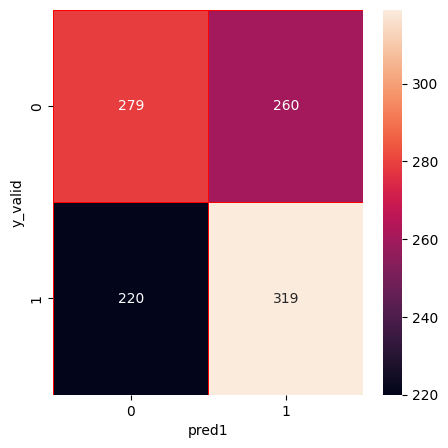

In [72]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred1).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred1")
plt.ylabel("y_valid")
plt.show()

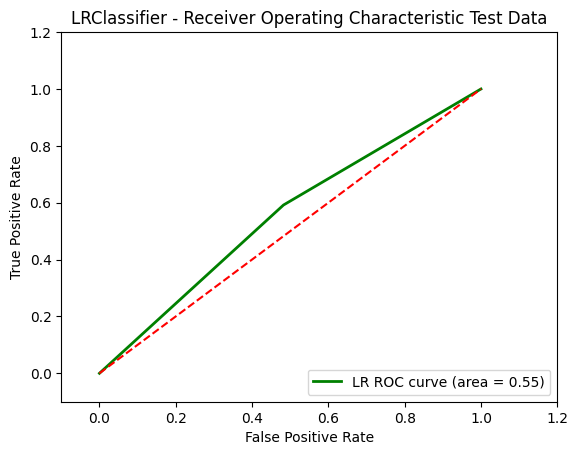

In [73]:
#roc curve
fpr1,tpr1,thres1 = roc_curve(y_valid, pred1)   
roc_auc1 = auc(fpr1, tpr1)   
plt.title('LRClassifier - Receiver Operating Characteristic Test Data') 
plt.plot(fpr1, tpr1, color ='green', lw = 2, label='LR ROC curve (area = %0.2f)' % roc_auc1) 
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

#### Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
# Defining model
tree = DecisionTreeClassifier(max_depth = 10,criterion = 'gini',random_state = 42)  

In [76]:
t1 = time.time()
tree.fit(X_train,y_train)
pred2 = tree.predict(X_valid)
t2 = time.time()

In [77]:
t = t2 - t1
print(f"time taken for model: {t} s")

time taken for model: 0.060491085052490234 s


In [78]:
ts2 = accuracy_score(y_valid, pred2)*100  #test accuracy
trn2 = accuracy_score(y_train, tree.predict(X_train))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred2)
Sen2 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc2 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr2 = 1-Sen2

In [79]:
print('\nDecisionTree model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred2))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))


DecisionTree model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.55      0.54      0.55       539
           1       0.55      0.55      0.55       539

    accuracy                           0.55      1078
   macro avg       0.55      0.55      0.55      1078
weighted avg       0.55      0.55      0.55      1078


Confusion matrix for test data:
 [[292 247]
 [240 299]]

Sensitivity :  0.5476190476190477
Specificity :  0.5488721804511278


True Neg:292
False Pos:247
False Neg:240
True Pos:299


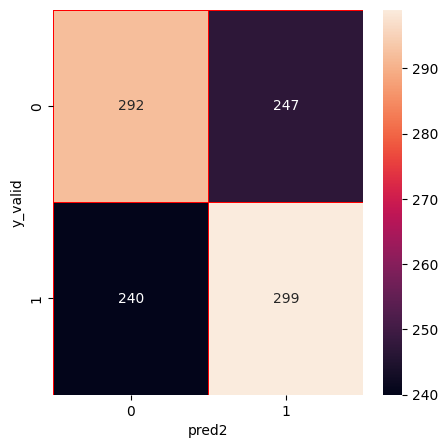

In [80]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred2).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred2")
plt.ylabel("y_valid")
plt.show()

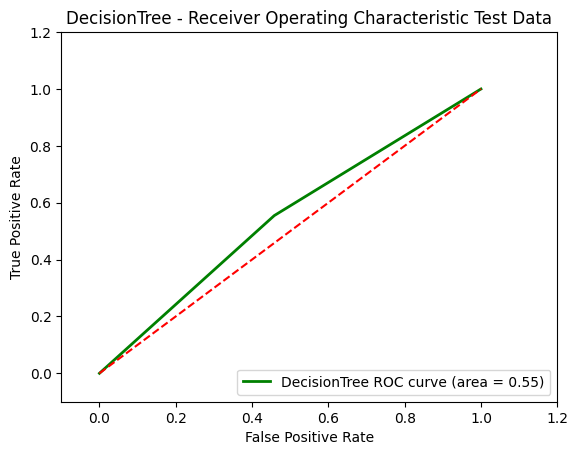

In [81]:
#roc curve
fpr2,tpr2,thres2 = roc_curve(y_valid, pred2) 
roc_auc2 = auc(fpr2, tpr2)
plt.title('DecisionTree - Receiver Operating Characteristic Test Data') 
plt.plot(fpr2, tpr2, color ='green', lw = 2, label='DecisionTree ROC curve (area = %0.2f)' % roc_auc2)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

#### Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [83]:
rsearch1_best_params = {'n_estimators': range(25,125,25), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

In [84]:
# defining the model
RF = RandomForestClassifier(n_estimators=1000,
                         criterion='gini',
                         max_depth=12,
                         max_features='log2',
                         min_samples_leaf=1,
                         min_samples_split=5,
                         random_state=42) 

In [85]:
t1 = time.time()
RF.fit(X_train,y_train)
pred3 = RF.predict(X_valid)
t2 = time.time()

In [86]:
t = t2 - t1
print(f"execution time for model: {t} s")

execution time for model: 2.104599952697754 s


In [87]:
ts3  = accuracy_score(y_valid, pred3)*100  #test accuracy
trn3 = accuracy_score(y_train, RF.predict(X_train))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred3)  
Sen3 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc3 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr3 = 1-Sen3

In [88]:
print('\nRandomForestClassifier model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred3))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))


RandomForestClassifier model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.60      0.55      0.57       539
           1       0.58      0.63      0.61       539

    accuracy                           0.59      1078
   macro avg       0.59      0.59      0.59      1078
weighted avg       0.59      0.59      0.59      1078


Confusion matrix for test data:
 [[297 242]
 [199 340]]

Sensitivity :  0.584192439862543
Specificity :  0.5987903225806451


True Neg:297
False Pos:242
False Neg:199
True Pos:340


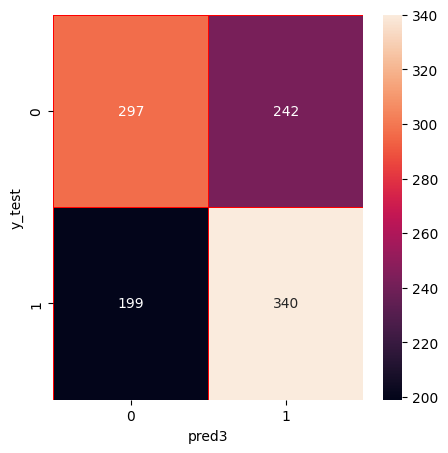

In [89]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred3).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred3")
plt.ylabel("y_test")
plt.show()

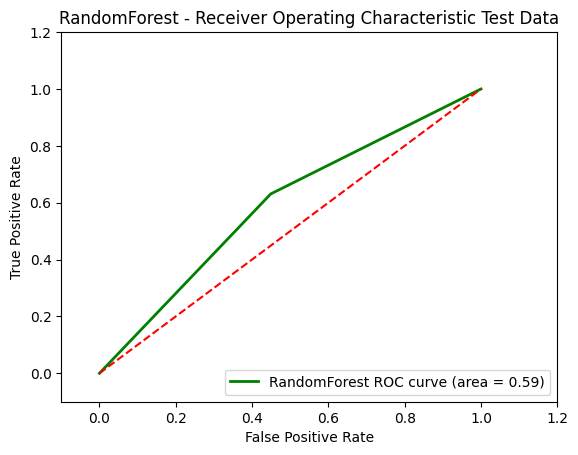

In [90]:
fpr3,tpr3,thres3 = roc_curve(y_valid, pred3) 
roc_auc3 = auc(fpr3, tpr3)
plt.title('RandomForest - Receiver Operating Characteristic Test Data') 
plt.plot(fpr3, tpr3, color ='green', lw = 2, label='RandomForest ROC curve (area = %0.2f)' % roc_auc3)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

#### Neural Network Classifier

In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Concatenate, Dense, Dropout, Embedding, Input, Reshape

In [92]:
train_data = final_df.iloc[:,:720]

In [93]:
test_data =final_df.iloc[:,720 :]

In [94]:
list(train_data.columns)

['make',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating',
 'is_claim',
 'policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'segment_B1',
 'segment_B2',
 'segment_C1',
 'segment_C2',
 'segment_Utility',
 'model_M10',
 'model_M11',
 'model_M2',
 'model_M3',
 'model_M4',
 'model_M5',
 'model_M6',
 'model_M7',
 'model_M8',
 'model_M9',
 'fuel_type_Diesel',
 'fuel_type_Petrol',
 'max_torque_170Nm@4000rpm',
 'max_torque_200Nm@1750rpm',
 'max_torque_200Nm@3000rpm',
 'max_torque_250Nm@2750rpm',
 

In [95]:
final_df.dtypes

make                        int64
airbags                   float64
is_esc                      int64
is_adjustable_steering      int64
is_tpms                     int64
                           ...   
area_cluster_C5              bool
area_cluster_C6              bool
area_cluster_C7              bool
area_cluster_C8              bool
area_cluster_C9              bool
Length: 101, dtype: object

In [96]:
final_copy.replace({'Yes': 1, 'No': 0}, inplace = True)

In [97]:
for col in final_copy:
    print(f'{col}: {final_copy[col].unique()}') 

make: [1 2 3 4 5]
segment: ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
model: ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M10' 'M9' 'M11']
fuel_type: ['CNG' 'Petrol' 'Diesel']
max_torque: ['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '85Nm@3000rpm' '200Nm@1750rpm'
 '170Nm@4000rpm']
max_power: ['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '61.68bhp@6000rpm' '97.89bhp@3600rpm' '118.36bhp@5500rpm']
engine_type: ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'G12B' 'i-DTEC' '1.5 Turbocharged Revotron']
airbags: [2. 6. 1.]
is_esc: [0 1]
is_adjustable_steering: [0 1]
is_tpms: [0 1]
is_parking_sensors: [1 0]
is_parking_camera: [0 1]
rear_brakes_type: ['Drum' 'Disc']
displacement: [ 796. 1197.  999. 1493. 1497.  998. 1196. 1498. 1199.]
cylinder: [3. 4.]
transmission_type: ['Manual' 

In [98]:
final_copy.columns

Index(['make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power',
       'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'policy_tenure',
       'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density'],
      dtype='object')

In [99]:
final_df_enc = pd.get_dummies(data=final_copy, columns=['max_torque','max_torque','area_cluster','engine_type','max_power','rear_brakes_type','model','segment','fuel_type'])

In [100]:
final_df_enc.sample(5)

,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,transmission_type,...,model_M9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol
51132,1,2.0,0,0,0,1,0,796.0,3.0,Manual,...,False,True,False,False,False,False,False,True,False,False
44421,1,2.0,0,1,0,1,0,1197.0,4.0,Manual,...,False,False,False,True,False,False,False,False,False,True
38283,2,2.0,0,0,0,0,1,999.0,3.0,Automatic,...,False,True,False,False,False,False,False,False,False,True
46883,1,2.0,0,1,0,1,0,1197.0,4.0,Manual,...,False,False,False,True,False,False,False,False,False,True
47103,5,2.0,0,1,0,1,1,1498.0,4.0,Manual,...,True,False,False,False,True,False,False,False,True,False


In [101]:
final_df_enc.dtypes

make                        int64
airbags                   float64
is_esc                      int64
is_adjustable_steering      int64
is_tpms                     int64
                           ...   
segment_C2                   bool
segment_Utility              bool
fuel_type_CNG                bool
fuel_type_Diesel             bool
fuel_type_Petrol             bool
Length: 117, dtype: object

In [102]:
cols_to_scale = ['displacement','cylinder','airbags','make']

In [103]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [104]:
scaler = MinMaxScaler()
final_df_enc[cols_to_scale] = scaler.fit_transform(final_df_enc[cols_to_scale])

In [105]:
final_df_enc.sample(3)

,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,transmission_type,...,model_M9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol
57173,0.0,0.2,0,1,0,1,0,0.571225,1.0,Manual,...,False,False,False,True,False,False,False,False,False,True
1728,0.5,1.0,1,1,1,1,1,0.992877,1.0,Automatic,...,False,False,False,False,False,True,False,False,True,False
34918,0.0,0.2,0,0,0,1,0,0.000000,0.0,Manual,...,False,True,False,False,False,False,False,True,False,False


In [106]:
obj = final_df_enc.select_dtypes(include = ['object']).columns

In [107]:
obj

Index(['transmission_type', 'steering_type'], dtype='object')

In [108]:
final_df_enc.drop(['transmission_type', 'steering_type'], axis = 1, inplace = True)

In [109]:
X = final_df_enc.drop('is_claim',axis='columns')
y = final_df_enc['is_claim']

In [110]:
# Splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [111]:
X_train.shape

(46753, 114)

In [112]:
X_test.shape

(11689, 114)

In [113]:
model = keras.Sequential([
    keras.layers.Dense(114, input_shape=(114,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/Users/snigdhasinha/anaconda3/envs/insurance_marketing/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.8778 - loss: 7.7193   
Epoch 2/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.8775 - loss: 3.9161
Epoch 3/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.8816 - loss: 1.9712
Epoch 4/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.9092 - loss: 1.4995
Epoch 5/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.9343 - loss: 0.2512
Epoch 6/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.9331 - loss: 0.2509
Epoch 7/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.9337 - loss: 0.2501
Epoch 8/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.9351 - loss: 0.2698
Epoch 9/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.9350 - loss: 0.2516
Epoch 10/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.9326 - loss: 0.2570
Epoch 11/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.9356 - loss: 0.2478
Epoch 

In [114]:
model.evaluate(X_test, y_test)

366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.9413 - loss: 0.2238


[0.2262144535779953, 0.9403712749481201]

In [115]:
yp = model.predict(X_test)
yp[:5]

366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step


array([[0.06528651],
       [0.06528651],
       [0.06528651],
       [0.06528651],
       [0.06528651]], dtype=float32)

In [116]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10992
           1       0.00      0.00      0.00       697

    accuracy                           0.94     11689
   macro avg       0.47      0.50      0.48     11689
weighted avg       0.88      0.94      0.91     11689



/Users/snigdhasinha/anaconda3/envs/insurance_marketing/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/snigdhasinha/anaconda3/envs/insurance_marketing/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/snigdhasinha/anaconda3/envs/insurance_marketing/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

Text(95.72222222222221, 0.5, 'Truth')

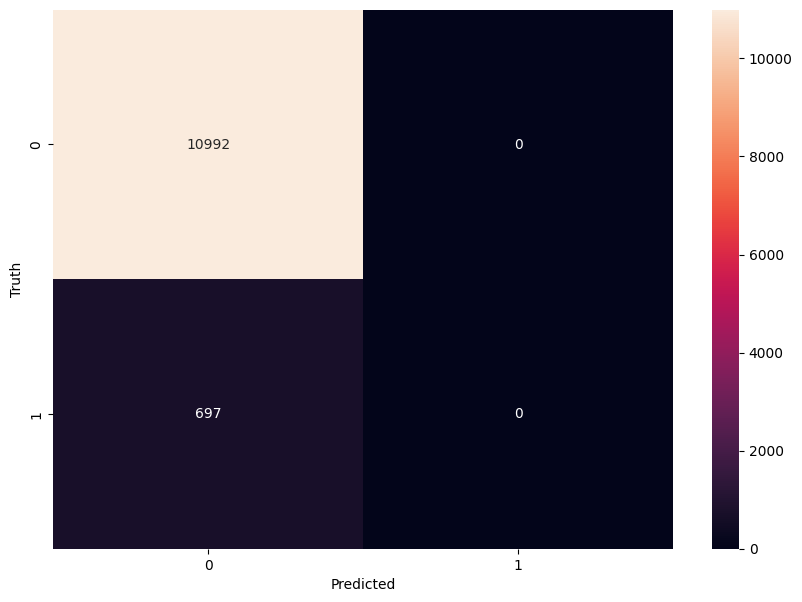

In [118]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [119]:
model = keras.Sequential([
    keras.layers.Dense(114, input_shape=(114,), activation='relu'),
     keras.layers.Dense(65, activation='relu'),
     keras.layers.Dense(45, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20


/Users/snigdhasinha/anaconda3/envs/insurance_marketing/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.9047 - loss: 6.4511     
Epoch 2/20
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.9336 - loss: 0.2716
Epoch 3/20
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.9335 - loss: 0.2714
Epoch 4/20
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.9349 - loss: 0.2513
Epoch 5/20
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.9343 - loss: 0.2510
Epoch 6/20
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.9347 - loss: 0.2545
Epoch 7/20
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.9347 - loss: 0.2479
Epoch 8/20
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9359 - loss: 0.2428
Epoch 9/20
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.9344 - loss: 0.2488
Epoch 10/20
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.9360 - loss: 0.2436
Epoch 11/20
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.9375 - loss: 0.2377
Epoch 12/20
14

In [120]:
a, trn4 = model.evaluate(X_test, y_test)

366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9413 - loss: 0.2243


In [121]:
a1,ts4 =  model.evaluate(X_train, y_train)

1462/1462 ━━━━━━━━━━━━━━━━━━━━ 1s 342us/step - accuracy: 0.9382 - loss: 0.2325


In [122]:
ts4 = ts4*100
trn4 = trn4*100

In [123]:
yp = model.predict(X_test)
yp[:5]

366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


array([[0.05020494],
       [0.06519556],
       [0.06841903],
       [0.06368421],
       [0.05212382]], dtype=float32)

In [124]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10992
           1       0.00      0.00      0.00       697

    accuracy                           0.94     11689
   macro avg       0.47      0.50      0.48     11689
weighted avg       0.88      0.94      0.91     11689



/Users/snigdhasinha/anaconda3/envs/insurance_marketing/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/snigdhasinha/anaconda3/envs/insurance_marketing/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/snigdhasinha/anaconda3/envs/insurance_marketing/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [126]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

NameError: name 'sn' is not defined

<Figure size 1000x700 with 0 Axes>

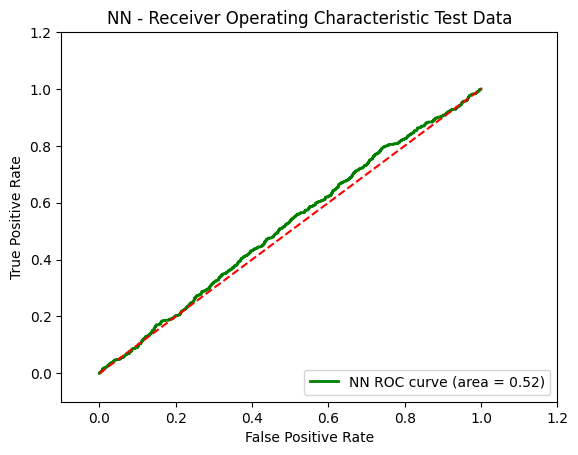

In [127]:
fpr1,tpr1,thres1 = roc_curve(y_test, yp[:])   
roc_auc1 = auc(fpr1, tpr1)   
plt.title('NN - Receiver Operating Characteristic Test Data') 
plt.plot(fpr1, tpr1, color ='green', lw = 2, label='NN ROC curve (area = %0.2f)' % roc_auc1) 
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

#### Comapring the different classification models

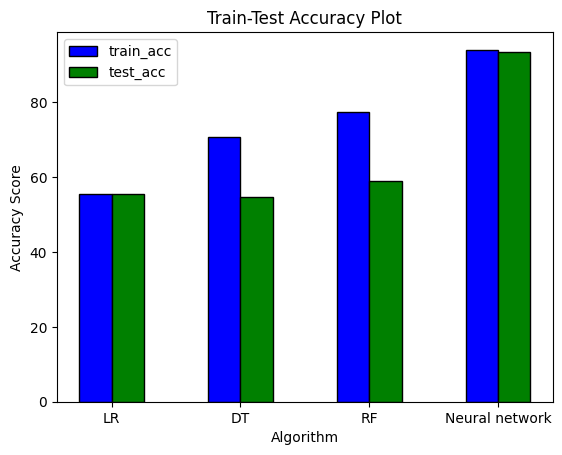

In [128]:
# Bar plots of train and test data accuracies for all models
train_acc = [trn1,trn2,trn3,trn4]
test_acc = [ts1, ts2, ts3, ts4]

n=4
r = np.arange(n)
width = 0.25
plt.bar(r, train_acc, color = 'b',width = width, edgecolor = 'black',label='train_acc')
plt.bar(r + width, test_acc, color = 'g',width = width, edgecolor = 'black',label='test_acc')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Train-Test Accuracy Plot")

# plt.grid(linestyle='--')
plt.xticks(r + width/2,['LR','DT','RF','Neural network'])
plt.legend()

plt.show()

In [129]:
models_df = pd.DataFrame(data= [train_acc,test_acc], columns =['LR','DT','RF','Neural network'], index = ['train', 'test'])

In [130]:
models_df

,LR,DT,RF,Neural network
train,55.450057,70.717812,77.440182,94.037127
test,55.473098,54.823748,59.090909,93.489188


<Axes: >

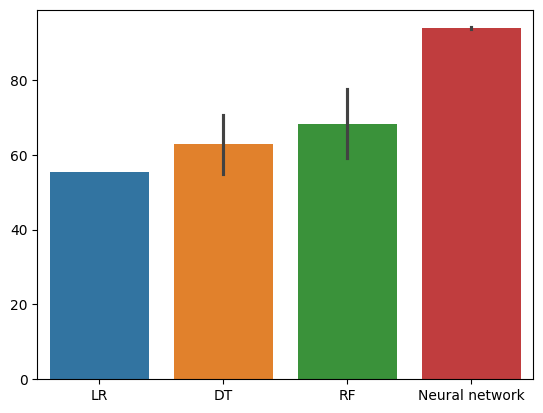

In [131]:
sns.barplot(data = models_df)

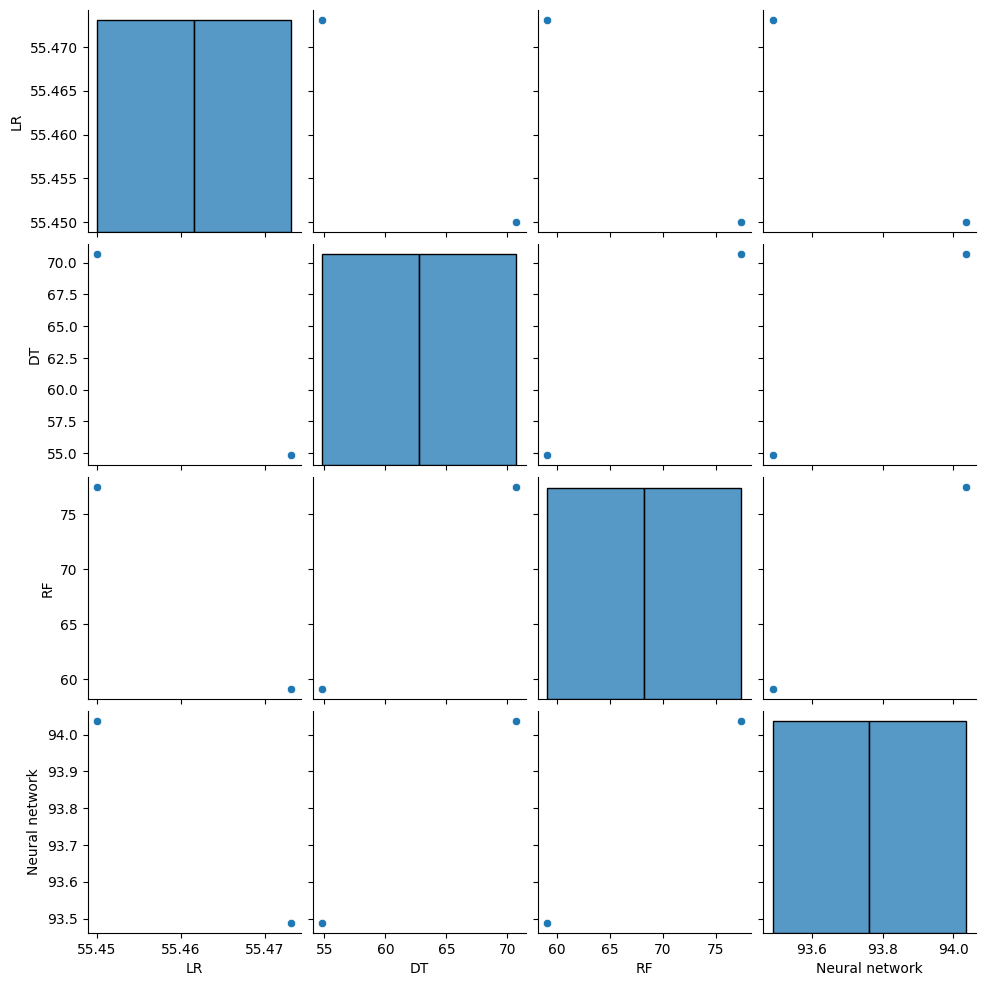

In [132]:
sns.pairplot(data = models_df)